# Trabalho 2
Trabalho 2 de Machine Learning: Artigo sobre Classificação

## Data prep

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d (%5.2f%%)' % (col,data[col].isna().sum(), data[col].isna().sum()/len(data)*100))

Number of instances = 13580
Number of attributes = 21
Number of missing values:
	Suburb: 0 ( 0.00%)
	Address: 0 ( 0.00%)
	Rooms: 0 ( 0.00%)
	Type: 0 ( 0.00%)
	Price: 0 ( 0.00%)
	Method: 0 ( 0.00%)
	SellerG: 0 ( 0.00%)
	Date: 0 ( 0.00%)
	Distance: 0 ( 0.00%)
	Postcode: 0 ( 0.00%)
	Bedroom2: 0 ( 0.00%)
	Bathroom: 0 ( 0.00%)
	Car: 62 ( 0.46%)
	Landsize: 0 ( 0.00%)
	BuildingArea: 6450 (47.50%)
	YearBuilt: 5375 (39.58%)
	CouncilArea: 1369 (10.08%)
	Lattitude: 0 ( 0.00%)
	Longtitude: 0 ( 0.00%)
	Regionname: 0 ( 0.00%)
	Propertycount: 0 ( 0.00%)


In [5]:
#Limpeza dos dados
data.dropna(inplace=True)

In [6]:
# Criando as classes de preço
data['PriceRange'] = pd.cut(data['Price'],[0,500000,1000000,1500000,np.inf],labels=['Baixo','Médio','Alto','Altíssimo'])

In [7]:
data.drop(['Address', 'Price', 'Method', 'SellerG', 'Date', 'Lattitude', 'Longtitude'], inplace=True, axis=1)

data.head()

,Suburb,Rooms,Type,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,PriceRange
1,Abbotsford,2,h,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0,Alto
2,Abbotsford,3,h,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0,Alto
4,Abbotsford,4,h,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0,Altíssimo
6,Abbotsford,3,h,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,Northern Metropolitan,4019.0,Altíssimo
7,Abbotsford,2,h,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,Northern Metropolitan,4019.0,Altíssimo


In [8]:
# Set variables for the targets and features
y = data['PriceRange']
#NOTA: usando X com dummies para lidar com atributos nominais
X = pd.get_dummies(data.drop(['PriceRange'], axis=1))

## Holdout

In [9]:
# Holdout
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=7)

## Random Forest Classifier

In [10]:
# Create the classifier and fit it to our training data
model = RandomForestClassifier(random_state=7, n_estimators=100)
model.fit(train_X, train_y)

RandomForestClassifier(random_state=7)

In [11]:
# Predict classes given the validation features
pred_y = model.predict(test_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(test_y, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.7527437056165268


Confusion matrix:
[[218  47   1  89]
 [ 51 226   0   5]
 [  0   1 124  78]
 [ 69   4  38 598]]

Normalized confusion matrix:
[[0.61408451 0.13239437 0.0028169  0.25070423]
 [0.18085106 0.80141844 0.         0.0177305 ]
 [0.         0.00492611 0.61083744 0.38423645]
 [0.09732017 0.00564175 0.05359661 0.84344147]]


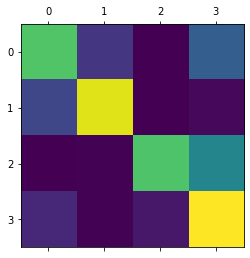

In [12]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(test_y, pred_y)
print(f"Confusion matrix:\n{confusion}")

normalizedConfusion = np.array([])

# Normalizing by the true label counts to get rates
for row in confusion:
    normalizedConfusion = np.append( normalizedConfusion, row/row.sum())

normalizedConfusion = np.reshape(normalizedConfusion,(4,4))


print(f"\nNormalized confusion matrix:")
print(normalizedConfusion)

plt.matshow(normalizedConfusion)

## K-Nearest Neighbors

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

In [14]:
pred_y

array(['Médio', 'Baixo', 'Alto', ..., 'Médio', 'Alto', 'Médio'],
      dtype=object)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[200  47   4 104]
 [ 70 185   5  22]
 [ 13   3 115  72]
 [ 92  21  80 516]]
              precision    recall  f1-score   support

        Alto       0.53      0.56      0.55       355
   Altíssimo       0.72      0.66      0.69       282
       Baixo       0.56      0.57      0.57       203
       Médio       0.72      0.73      0.73       709

    accuracy                           0.66      1549
   macro avg       0.64      0.63      0.63      1549
weighted avg       0.66      0.66      0.66      1549



## Naïve Bayes

In [16]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train_X, train_y)
y_pred = model.predict(test_X)
print("Number of mislabeled points out of a total %d points : %d"
      % (test_X.shape[0], (test_y != y_pred).sum()))

Number of mislabeled points out of a total 1549 points : 695


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[209  97  30  19]
 [ 59 222   1   0]
 [  5   2 159  37]
 [183  41 221 264]]
              precision    recall  f1-score   support

        Alto       0.46      0.59      0.52       355
   Altíssimo       0.61      0.79      0.69       282
       Baixo       0.39      0.78      0.52       203
       Médio       0.82      0.37      0.51       709

    accuracy                           0.55      1549
   macro avg       0.57      0.63      0.56      1549
weighted avg       0.65      0.55      0.55      1549



## Multilayer Perceptron

In [18]:
# MLP
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Set variables for the targets and features
# y = data['PriceRange']
#NOTA: usando X com dummies para lidar com atributos nominais
# X = pd.get_dummies(data.drop(['Address', 'Price', 'Method', 'SellerG', 'Date', 'Lattitude', 'Longtitude'], axis=1))


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [19]:
# print(X)
# print(y)
print("Input size: ", len(X.columns))

       Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1          2       2.5    3067.0       2.0       1.0  0.0     156.0   
2          3       2.5    3067.0       3.0       2.0  0.0     134.0   
4          4       2.5    3067.0       3.0       1.0  2.0     120.0   
6          3       2.5    3067.0       4.0       2.0  0.0     245.0   
7          2       2.5    3067.0       2.0       1.0  2.0     256.0   
...      ...       ...       ...       ...       ...  ...       ...   
12205      3      35.5    3757.0       3.0       2.0  1.0     972.0   
12206      3       6.8    3016.0       3.0       1.0  0.0     179.0   
12207      1       6.8    3016.0       1.0       1.0  1.0       0.0   
12209      2       4.6    3181.0       2.0       1.0  1.0       0.0   
12212      6       6.3    3013.0       6.0       3.0  2.0    1087.0   

       BuildingArea  YearBuilt  Propertycount  ...  CouncilArea_Yarra  \
1             79.00     1900.0         4019.0  ...                  1   
2

In [20]:
# define baseline model
def baseline_model():
    input_size = len(X.columns)

    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=input_size, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [21]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [22]:
kfold = KFold(n_splits=10, shuffle=True)

In [23]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 55.52% (12.44%)


In [24]:
#Kappa 
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.410146927003316

## Curva ROC e AUC

TODO